In [1]:
from Chapter2.CreateDataset import CreateDataset
import pandas as pd
import matplotlib.pyplot as plt
import os
import copy
from util.VisualizeDataset import VisualizeDataset
from util import util

In [2]:
rawdatapath = "data/raw/"
outputpath = "data/intermediate/"

if not os.path.exists(outputpath):
    print("Empty path, so creating..." + outputpath + "...done!")
    os.makedirs(outputpath)

In [3]:
accraw= pd.read_csv(rawdatapath+"Accelerometer_raw.csv")
timecol = "Time (s)"
accfeatures = list()
for col in accraw:
    if (col != timecol) and \
    (col != "Absolute acceleration (m/s^2)"):
        accfeatures.append(col)
accfeatures

['Acceleration x (m/s^2)', 'Acceleration y (m/s^2)', 'Acceleration z (m/s^2)']

In [4]:
gyraw= pd.read_csv(rawdatapath+"Gyroscope_raw.csv")
gyfeatures = list()
for col in gyraw:
    if (col != timecol) and \
    (col != "Absolute (rad/s)"):
        gyfeatures.append(col)
gyfeatures

['Gyroscope x (rad/s)', 'Gyroscope y (rad/s)', 'Gyroscope z (rad/s)']

In [5]:
lightraw= pd.read_csv(rawdatapath+"Light_raw.csv")
lightfeatures = list()
for col in lightraw:
    if (col != timecol):
        lightfeatures.append(col)
lightfeatures

['Illuminance (lx)']

In [6]:
locraw= pd.read_csv(rawdatapath+"Location_raw.csv")
locfeatures = list()
for col in locraw:
    if (col != timecol) and \
    (col != "Satellites"):
        locfeatures.append(col)
locfeatures

['Latitude (°)',
 'Longitude (°)',
 'Altitude (m)',
 'Altitude WGS84 (m)',
 'Speed (m/s)',
 'Direction (°)',
 'Distance (km)',
 'Horizontal Accuracy (m)',
 'Vertical Accuracy (m)']

In [7]:
magraw= pd.read_csv(rawdatapath+"Magnetometer_raw.csv")
magfeatures = list()
for col in magraw:
    if (col != timecol) and \
    (col != "Absolute field (µT)"):
        magfeatures.append(col)
magfeatures

['Magnetic Field x (µT)', 'Magnetic Field y (µT)', 'Magnetic Field z (µT)']

In [8]:
granularities = [60000, 250]
datasets = []

Reading data from Accelerometer_raw.csv
Reading data from Gyroscope_raw.csv
Reading data from Light_raw.csv
Reading data from Location_raw.csv
Reading data from Magnetometer_raw.csv
Figure saved to figures\figure_1.png


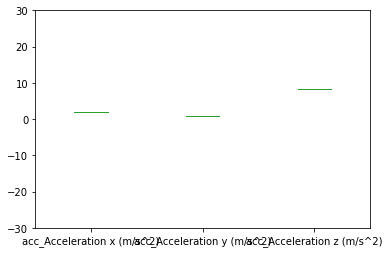

C:\Users\Helia\OneDrive\VU-Cources\Machine-Learning-for-the-Quantified-Self\assignments\ML4QS\assignment01\util\VisualizeDataset.py:106: UserWarning: Attempting to set identical bottom == top == 46.24668850568213 results in singular transformations; automatically expanding.
  max(max_values) + 0.1*(max(max_values) - min(min_values))])


Figure saved to figures\figure_2.png


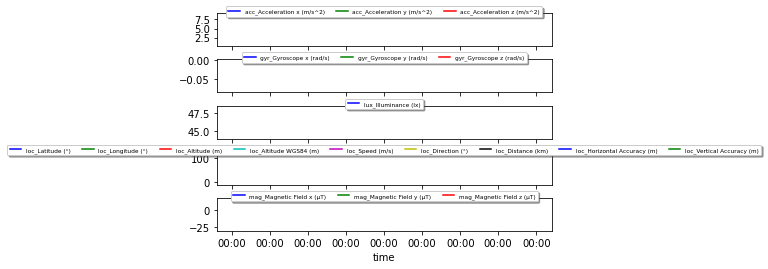

       gyr_Gyroscope x (rad/s)  gyr_Gyroscope y (rad/s)  gyr_Gyroscope z (rad/s)  lux_Illuminance (lx)  loc_Latitude (°)  loc_Longitude (°)  loc_Altitude (m)  loc_Altitude WGS84 (m)  loc_Speed (m/s)  loc_Direction (°)  loc_Distance (km)  loc_Horizontal Accuracy (m)  loc_Vertical Accuracy (m)  mag_Magnetic Field x (µT)  mag_Magnetic Field y (µT)  mag_Magnetic Field z (µT)
count                    1.000                    1.000                    1.000                 1.000               1.0                1.0             1.000                   1.000              1.0                1.0               1.00                        1.000                      1.000                      1.000                       1.00                      1.000
mean                    -0.005                   -0.006                   -0.077                46.247              28.7              116.0            37.879                  33.473              0.0                0.0               0.07                

In [9]:
for g in granularities:
    
    Dataset = CreateDataset(rawdatapath, g)

    Dataset.add_numerical_dataset("Accelerometer_raw.csv", timecol, accfeatures, "avg", "acc_")

    Dataset.add_numerical_dataset("Gyroscope_raw.csv", timecol, gyfeatures, "avg", "gyr_")
    
    Dataset.add_numerical_dataset("Light_raw.csv", timecol, lightfeatures, "avg", "lux_")
    
    Dataset.add_numerical_dataset("Location_raw.csv", timecol, locfeatures, "avg", "loc_")
    
    Dataset.add_numerical_dataset("Magnetometer_raw.csv", timecol, magfeatures, "avg", "mag_")
    #Dataset = accraw
    dataset = Dataset.data_table
    #print(dataset)
    Dataviz = VisualizeDataset()
    
    Dataviz.plot_dataset_boxplot(dataset, ['acc_Acceleration x (m/s^2)', 'acc_Acceleration y (m/s^2)', 'acc_Acceleration z (m/s^2)'])
    #Dataviz.plot_dataset_boxplot(dataset, ['acc_x', 'acc_y', 'acc_z'])
    Dataviz.plot_dataset(dataset, ["acc_", "gyr_", "lux_", "loc_", "mag_"], \
                            ["like", "like", "like", "like", "like"], \
                            ["line", "line", "line", "line", "line"])
    
    util.print_statistics(dataset)
    datasets.append(copy.deepcopy(dataset))

In [10]:
util.print_latex_table_statistics_two_datasets(datasets[0], datasets[1])
dataset.to_csv(outputpath + 'chapter2_result.csv')

IndexError: list index out of range